<a href="https://colab.research.google.com/github/Kaustuv1234/ML_from_scratch/blob/main/ANN_(AUS_weather).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns

from pylab import rcParams

import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from torch import nn, optim
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE =\
["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/weatherAUS.csv')
df.shape

(145460, 23)

In [3]:
df = df[['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday', 'RainTomorrow']]
df.head(20)

,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,0.6,22.0,1007.7,No,No
1,0.0,25.0,1010.6,No,No
2,0.0,30.0,1007.6,No,No
3,0.0,16.0,1017.6,No,No
4,1.0,33.0,1010.8,No,No
5,0.2,23.0,1009.2,No,No
6,0.0,19.0,1009.6,No,No
7,0.0,19.0,1013.4,No,No
8,0.0,9.0,1008.9,No,Yes
9,1.4,27.0,1007.0,Yes,No


In [4]:
df['RainToday'].replace({'Yes':1, 'No':0}, inplace=True)
df['RainTomorrow'].replace({'Yes':1, 'No':0}, inplace=True)
df.head(20)

,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,0.6,22.0,1007.7,0.0,0.0
1,0.0,25.0,1010.6,0.0,0.0
2,0.0,30.0,1007.6,0.0,0.0
3,0.0,16.0,1017.6,0.0,0.0
4,1.0,33.0,1010.8,0.0,0.0
5,0.2,23.0,1009.2,0.0,0.0
6,0.0,19.0,1009.6,0.0,0.0
7,0.0,19.0,1013.4,0.0,0.0
8,0.0,9.0,1008.9,0.0,1.0
9,1.4,27.0,1007.0,1.0,0.0


In [5]:
df = df.dropna(how='any')
df.head(20)

,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,0.6,22.0,1007.7,0.0,0.0
1,0.0,25.0,1010.6,0.0,0.0
2,0.0,30.0,1007.6,0.0,0.0
3,0.0,16.0,1017.6,0.0,0.0
4,1.0,33.0,1010.8,0.0,0.0
5,0.2,23.0,1009.2,0.0,0.0
6,0.0,19.0,1009.6,0.0,0.0
7,0.0,19.0,1013.4,0.0,0.0
8,0.0,9.0,1008.9,0.0,1.0
9,1.4,27.0,1007.0,1.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


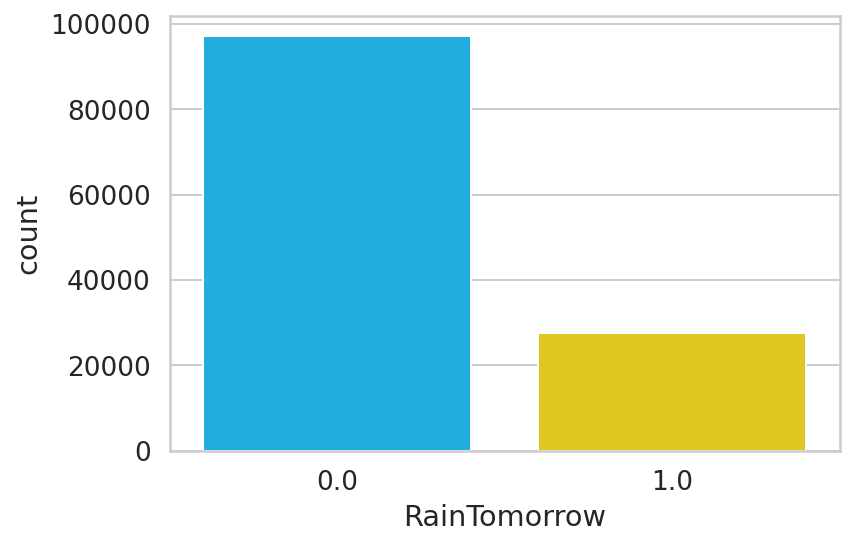

In [6]:
sns.countplot(df['RainTomorrow'])

In [7]:
''' handle imbalanced datasets here'''

' handle imbalanced datasets here'

In [8]:
X = df[['Rainfall', 'Humidity3pm', 'RainToday', 'Pressure9am']]
y = df[['RainTomorrow']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [9]:
def print_shape(**kwargs):
  for key in kwargs:
    print(key, ':', kwargs[key].shape)

Convert to tensors

In [10]:
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

print_shape(X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

X_train : torch.Size([99751, 4])
y_train : torch.Size([99751])
X_test : torch.Size([24938, 4])
y_test : torch.Size([24938])


Neural Network

In [11]:
class ANN(nn.Module):
  def __init__(self, n_features):
    super(ANN, self).__init__()
    self.layer1 = nn.Linear(n_features, 8)
    self.layer2 = nn.Linear(8, 4)
    self.layer3 = nn.Linear(4, 1)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    out = torch.sigmoid(self.layer3(x))
    return out

ann = ANN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(ann.parameters(), lr=0.001)

Doing it on the GPU

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
ann = ann.to(device)
criterion = criterion.to(device)

In [13]:
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

Training the model

In [14]:
for epoch in range(1001):
    y_pred = ann(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)

    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, y_pred)
      y_test_pred = ann(X_test)
      y_test_pred = torch.squeeze(y_test_pred)
      test_loss = criterion(y_test_pred, y_test)
      test_acc = calculate_accuracy(y_test, y_test_pred)
      print(
      f'''epoch {epoch}
      Train_set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
      Test_set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
      ''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch 0
      Train_set - loss: 7.263, accuracy: 0.221
      Test_set - loss: 7.256, accuracy: 0.222
      
epoch 100
      Train_set - loss: 0.481, accuracy: 0.781
      Test_set - loss: 0.481, accuracy: 0.781
      
epoch 200
      Train_set - loss: 0.428, accuracy: 0.808
      Test_set - loss: 0.428, accuracy: 0.808
      
epoch 300
      Train_set - loss: 0.405, accuracy: 0.833
      Test_set - loss: 0.404, accuracy: 0.835
      
epoch 400
      Train_set - loss: 0.401, accuracy: 0.834
      Test_set - loss: 0.401, accuracy: 0.837
      
epoch 500
      Train_set - loss: 0.401, accuracy: 0.834
      Test_set - loss: 0.4, accuracy: 0.836
      
epoch 600
      Train_set - loss: 0.4, accuracy: 0.834
      Test_set - loss: 0.4, accuracy: 0.836
      
epoch 700
      Train_set - loss: 0.4, accuracy: 0.834
      Test_set - loss: 0.399, accuracy: 0.836
      
epoch 800
      Train_set - loss: 0.4, accuracy: 0.834
      Test_set - loss: 0.399, accuracy: 0.837
      
epoch 900
      Train_

Saving model

In [15]:
MODEL_PATH = '/content/drive/MyDrive/models/weatherAUSmodel.sv'
torch.save(ann, MODEL_PATH)

Loading model

In [16]:
net = torch.load(MODEL_PATH)

In [17]:
classes = ['No rain', 'Raining']
y_pred = net(X_test)
y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_test.cpu()
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

     No rain       0.85      0.96      0.90     19413
     Raining       0.73      0.42      0.53      5525

    accuracy                           0.84     24938
   macro avg       0.79      0.69      0.72     24938
weighted avg       0.83      0.84      0.82     24938



Text(0.5, 9.5, 'Predicted label')

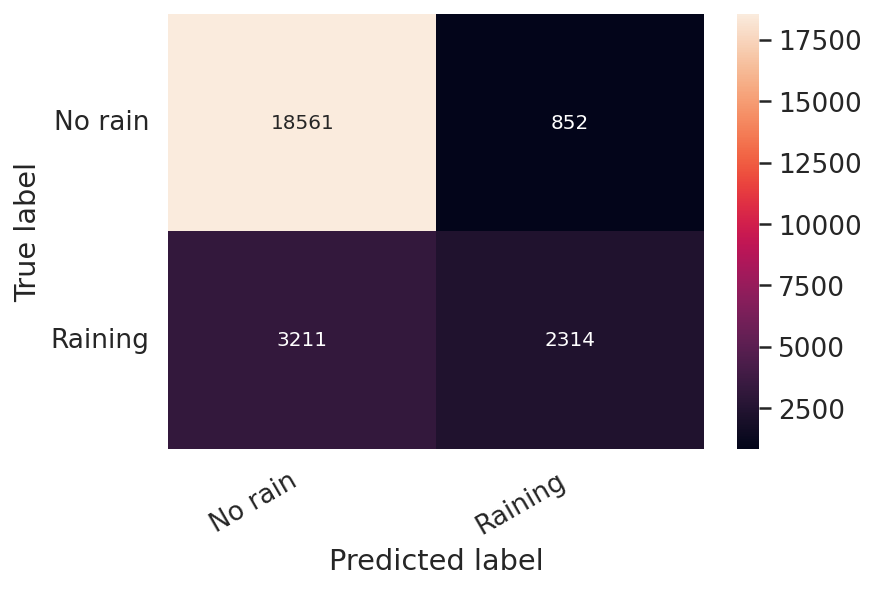

In [18]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [19]:
def will_it_rain(rainfall, humidity, rain_today, pressure):
  t = torch.as_tensor([rainfall, humidity, rain_today, pressure]).float().to(device)
  output = net(t)
  return output.ge(0.5).item()

In [20]:
will_it_rain(35, 20, True, 22.4)

False